# Análise de correlação entre variáveis

para realizar uma análise, será preciso carregarmos cada dataframe e identificar variáveis relevantes. em resumo, será aplicado:
- coeficiente de relacão (pearson)
- matriz de correlação (heatmap)

os dataframes, como **df_vendedores**, **df_unidades** e **df_categorias** foram ignorados porque não possuem variáveis relevantes para a correlação.

In [ ]:
import pandas as pd
from joblib import load
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## `df_produtos`

In [3]:
df_produtos = load('../../util/data/df_produtos.z')

In [ ]:
df_produtos_categorica = df_produtos[['unidade', 'marca', 'categoria', 'classificacao']] # seleção de colunas categóricas
df_produtos_onehot = pd.get_dummies(df_produtos_categorica) # aplica one-hot encoding nas colunas selecionadas

df_produtos_onehot.head(3)

,unidade_CEN,unidade_CJ,unidade_CX,unidade_M,unidade_ROL,unidade_UN,marca_3M,marca_BIC,marca_BOSE,marca_EDIOURO,...,categoria_MIDIA DE ARMAZENAMENTO,categoria_MOVEIS,categoria_PARAFUSO,categoria_PASTA,categoria_PRESENTE,categoria_SOFAS,categoria_SOM AUTOMOTIVO,categoria_TELEVISAO,categoria_TINTA,classificacao_MERCADORIA PARA REVENDA
0,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_produtos_onehot = pd.concat([df_produtos_onehot, df_produtos['preco_venda']], axis=1) # concatenação das variáveis com a variável alvo

df_correlacao_preco = df_produtos_onehot.corr()['preco_venda'].sort_values(ascending=False) # aplicando correlação de cada variavel com o preço de venda

print(df_correlacao_preco)

com a visualização do output, temos a seguinte conclusão:
- **valores positivos**: produtos dessas categorias/marcas tendem a ter preços de venda mais altos.
(ex.: `categoria_MOVEIS`, `marca_GALLO`):  

- **valores negativos**: produtos dessas categorias/marcas tendem a ter preços de venda mais baixos.
(ex.: `marca_BIC`, `categoria_CANETA`):  

- **Valores próximos de zero**: possuem praticamente nenhuma relação com o preço de venda.


## `df_vendas`

In [40]:
df_vendas = load('../../util/data/df_vendas.z')

In [ ]:
df_vendas_numerica = df_vendas[['quantidade', 'total', 'custo_medio', 'valor_desconto']] # seleção de colunas numericas
df_correlacao_vendas = df_vendas_numerica.corr() # aplicando correlação

print(df_correlacao_vendas)

                quantidade     total  custo_medio  valor_desconto
quantidade        1.000000  0.185695    -0.040050        0.633334
total             0.185695  1.000000     0.743662        0.669569
custo_medio      -0.040050  0.743662     1.000000        0.482421
valor_desconto    0.633334  0.669569     0.482421        1.000000


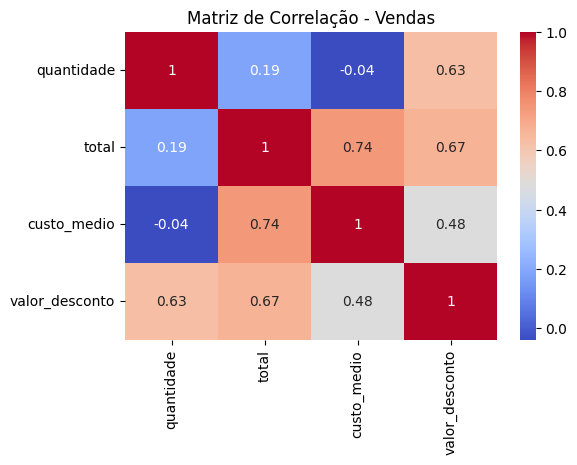

In [ ]:
# visualiza a matriz de correlação
plt.figure(figsize=(6,4))
sns.heatmap(df_correlacao_vendas, annot=True, cmap='coolwarm')
plt.title('matriz de correlação [vendas]')
plt.show()

conclusão:
- **quantidade x valor_desconto (0.63):**  
  vendas com maior quantidade tendem a ter maior valor de desconto.

- **total x custo_medio (0.74):**  
  vendas com maior total tendem a ter maior custo médio (possivelmente produtos mais caros).

- **total x valor_desconto (0.67):**  
  Vendas com maior total também costumam ter maior desconto.

- **quantidade x total (0.19):**  
  relação fraca, indicando que nem sempre vender mais unidades significa um valor total muito maior (talvez por descontos ou produtos baratos).

- **quantidade x custo_medio (-0.04):**  
  praticamente nenhuma relação entre quantidade vendida e custo médio.



## `df_clientes`

Variáveis categóricas, como **natureza_juridica**,**contribuinte_icms**, **cst** foram selecionadas, serão transformadas para aplicar a correlação.

In [57]:
df_clientes = load('../../util/data/df_clientes.z')

In [ ]:
df_clientes_categorica = df_clientes.select_dtypes(exclude=[np.number]) # seleção de colunas categóricas
df_clientes_categorica_onehot = pd.get_dummies(df_clientes_categorica[['natureza_juridica', 'contribuinte_icms', 'cst']]) # aplica one-hot encoding nas colunas selecionadas

df_clientes_categorica_onehot.head(3)

,natureza_juridica_LT,natureza_juridica_PF,contribuinte_icms_N,contribuinte_icms_S,cst_PD
0,False,True,True,False,True
1,True,False,False,True,True
2,True,False,False,True,True


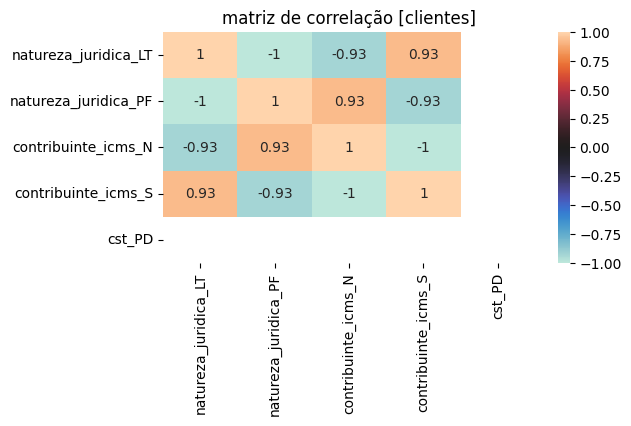

In [ ]:
df_clientes_categorica_corr = df_clientes_categorica_onehot.corr() # calcula a matriz de correlação

# visualiza a matriz de correlação
plt.figure(figsize=(6,3))
sns.heatmap(df_clientes_categorica_corr, annot=True, cmap='icefire')
plt.title('matriz de correlação [clientes]')
plt.show()

### conclusão:
- as variáveis entre si não indicam muito. para análises mais ricas, recomenda-se cruzar essas informações com dados de vendas ou outras métricas de interesse.